<a href="https://colab.research.google.com/github/LM1997610/Social_Networks/blob/main/HW_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <h1><center>Social Networks and Online Markets</center></h1>
## <h2><center>Homework 1</center></h2>
## <h4><center>2023/2024</center></h4>
## <h3><center>Luca Mazzucco: 1997610</center></h3>

In [ ]:
import os
import sys

import random
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

from IPython.display import Image
from collections import Counter, defaultdict

from tqdm.auto import tqdm

In [ ]:
! git clone -q https://github.com/LM1997610/Social_Networks

In [ ]:
if os.getcwd().split('/')[-1] != 'Social_Networks':
  os.chdir('Social_Networks')

## 1) The Barabassi-Albert Preferential Attachment Model:

Generalization of the model where a node is selected at time $ t+1 $ with probability that is proportional to its degree plus a constant $c$,\
Node *u* is selected with probability:

$$ \frac{{d_u + c}}{{\sum\limits_{\substack{w \in V_{t-1}}}(d_w + c)}} = \frac{{d_u +c}}{{(t-1)(2\ell +c)}}$$




Need to define:
- $ nk(t) $: mean number of nodes at time $t$ with degree $k$
- $ pk(t) = \frac{n_k(t)}{t} $: mean ratio of nodes at time t with degree $k$ <br/><br/>

For $ k > \ell $ we have:

$$ n_k(t+1)=n_k(t)+n_{k-1}(t)\frac{k+c-1}{(2\ell+c)t}\ell -n_k(t) \frac{k+c}{(2\ell+c)t}\ell $$
<br/><br/>
$$ (t+1)p_k(t+1)=t p_k(t) +p_{k-1}(t)\frac{k+c-1}{2\ell+c}\ell -p_k(t)\frac{k+c}{2\ell+c}\ell $$

From which we get:

$$ p_k = p_{k-1} \frac{k-1+c}{k+2+c+c/ℓ} $$

For $ k = \ell $:

$$ p_{\ell} = \frac{2+c/ℓ}{\ell+2+c+c/ℓ} $$

Bringing them together for $ k \ge \ell $:

$$ p_k = \frac{2+c/ℓ}{(k+2+c+c/ℓ)} \frac{\ell+c}{(k+3+c+c/ℓ)} \frac{\ell+c+1}{(k+4+c+c/ℓ)}  $$
<br/><br/>
This shows that the degree distribution when t → ∞ is approximately a power law with exponent $3 + c/ℓ $


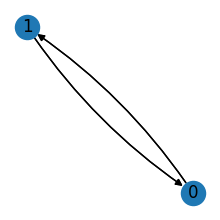

In [ ]:
G = nx.MultiDiGraph()

G.add_node('0')
G.add_node('1')

G.add_edge('0', '1'); G.add_edge('0', '1')
G.add_edge('1', '0'); G.add_edge('1', '0')

pos = nx.spring_layout(G)

plt.figure(figsize=(2, 2))

nx.draw(G, pos, with_labels=True, connectionstyle='arc3, rad = 0.1')

plt.show()

In [ ]:
def prob_each_node(graph, time, l=4, c=0):

  degrees = dict(graph.degree())
  denominator = (time - 1)*(2*l + c)
  my_prob_list = [(x+c)/denominator for x in list(degrees.values())]

  return my_prob_list

In [ ]:
c = 7
l = 4

times = range(2, 10000)

for t in tqdm(times):

  G.add_node(t)
  prob_vector = prob_each_node(G, time=t, l=l, c=c)
  selected_nodes = random.choices(list(G.nodes()), weights=prob_vector, k=4)

  for node in selected_nodes:
    G.add_edge(t, node)


  0%|          | 0/9998 [00:00<?, ?it/s]

In [ ]:
degree_distrib = nx.degree_histogram(G)
nodes = [i for i in range(0, len(degree_distrib))]

degree_distrib = [degree_distrib[i]/G.number_of_nodes() for i in range(len(degree_distrib))]

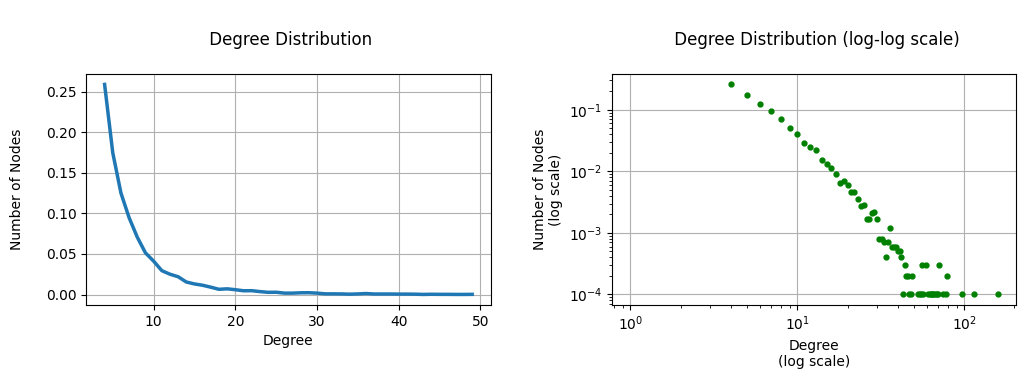

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(12, 3))

ax1.plot(nodes[l:50], degree_distrib[l:50], '-', linewidth=2.5)
ax1.set_title('\n Degree Distribution\n')
ax1.set_xlabel('Degree\n')
ax1.set_ylabel('Number of Nodes\n')
ax1.grid()

ax2.plot(nodes, degree_distrib, 'o', markersize=3.5, color='green')
ax2.set_title('\n Degree Distribution (log-log scale)\n')
ax2.set_xlabel('Degree\n(log scale)')
ax2.set_ylabel('Number of Nodes\n(log scale)')
ax2.set_xscale("log"); ax2.set_yscale("log")
ax2.grid()

plt.subplots_adjust(wspace=0.3)
plt.show()

In [ ]:
! pip -q install powerlaw

In [ ]:
import powerlaw as pwl

In [ ]:
%%capture
fit_function = pwl.Fit(list(dict(G.degree()).values()))

In [ ]:
round(fit_function.power_law.alpha, 2), 3+c/l

(4.11, 4.75)

## 2) Densest subgraph, Min-cut and Sparsest-cut:


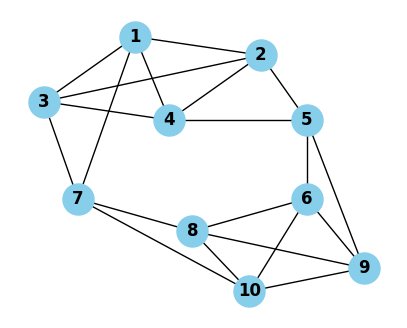

In [ ]:
number_of_nodes = 10

G = nx.Graph()
G.add_nodes_from(range(1, number_of_nodes))

edges = [(1, 2), (1, 3), (1, 4), (1, 7),
         (2, 3), (2, 4), (2, 5),
         (3, 4), (3, 7),
         (4, 5),
         (5, 6), (5, 9),
         (6, 8), (6, 9), (6, 10),
         (7, 8), (7, 10),
         (8, 9), (8, 10),
         (9, 10)]

G.add_edges_from(edges)

fixed_positions = {1:(2.0, 5.5), 2:(3.1, 5.1), 3:(1.2, 4.1), 4:(2.3, 3.7), 5:(3.5, 3.7),
                   6:(3.5, 2.0), 7:(1.5, 2.0), 8:(2.5, 1.3), 9:(4.0, 0.5), 10:(3.0, 0)}

fixed_nodes = fixed_positions.keys()
pos = nx.spring_layout(G, pos=fixed_positions, fixed = fixed_positions.keys())

fig, ax = plt.subplots(figsize=(5,4))

nx.draw(G, with_labels=True, ax=ax, pos=pos,
        node_color='skyblue', font_color='black', font_weight='bold', font_size=12, node_size=500)

In [ ]:
d_distrib = dict(G.degree())

print(f"Degree distribution: {d_distrib}")

Degree distribution: {1: 4, 2: 4, 3: 4, 4: 4, 5: 4, 6: 4, 7: 4, 8: 4, 9: 4, 10: 4}


In [ ]:
adj_matrix = nx.to_numpy_array(G)

print(f'Adjacency matrix A -> shape={adj_matrix.shape}:\n')
print(f'{adj_matrix}')

Adjacency matrix A -> shape=(10, 10):

[[0. 1. 1. 1. 0. 0. 1. 0. 0. 0.]
 [1. 0. 1. 1. 1. 0. 0. 0. 0. 0.]
 [1. 1. 0. 1. 0. 0. 1. 0. 0. 0.]
 [1. 1. 1. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 1. 0. 1. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0. 1. 1. 1.]
 [1. 0. 1. 0. 0. 0. 0. 1. 0. 1.]
 [0. 0. 0. 0. 0. 1. 1. 0. 1. 1.]
 [0. 0. 0. 0. 1. 1. 0. 1. 0. 1.]
 [0. 0. 0. 0. 0. 1. 1. 1. 1. 0.]]


Given an undirected graph $G=(V, E)$ finding the **densest subgraph**:\
Find a set $S ⊆ V$ that maximizes $f(S)$:

$$ f(S) = \frac{|E(S)|}{|S|} $$

where $E(S) = \{{u, v} ∈ E : u ∈ S, v ∈ S\}$ is the set of edges of the graph with both endpoints in $S$.

Greedy algorithm gives  a 2-approximation to the optimal solution:

In [ ]:
def GreedyDensestSubgraph(Graph):

    print(f"Nodes in G: {set(G.nodes())}\n")

    S = set(Graph.nodes())
    sub_graph = set(Graph.nodes())

    while len(S) > 1:

        v_node = min(S, key=lambda v: Graph.subgraph(S).degree(v))

        S.remove(v_node)

        density_S = len(Graph.subgraph(S).edges()) / len(S)
        density_subgraph = len(Graph.subgraph(sub_graph).edges()) / len(sub_graph)

        if density_S >= density_subgraph:
          sub_graph = set(S)
          print(f" removed node: {str(v_node)}")

    print(f"\nDensest SubGraph: {sub_graph}")
    return sub_graph

In [ ]:
densest_sgraph = GreedyDensestSubgraph(G)

Nodes in G: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10}


Densest SubGraph: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10}


The **min-cut** is the problem of finding a cut $(C_1, C_2)$ that *minimizes* $|E(C_1, C_2)|$ representing the number of edges\
between the two sets $C_1$ and $C_2$ (size of the cut):

$$ E(C_1, C_2) = \{(i, j) ∈ E : i ∈ C_1, j ∈ C_2\} $$



 Min-cut: {(9, 5), (4, 5), (2, 5), (6, 5)}



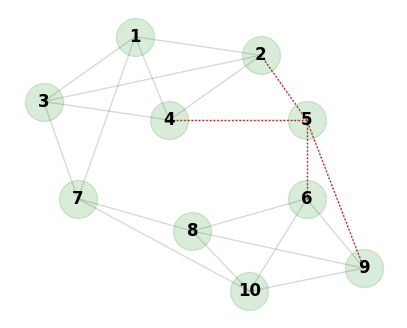

In [ ]:
## Minimum cut:

print(f'\n Min-cut: {nx.minimum_edge_cut(G)}\n')

fig, ax = plt.subplots(figsize=(5,4))
nx.draw_networkx_nodes(G, node_size=750, alpha = 0.15, node_color='green', pos = pos)


nx.draw_networkx_edges(G, edgelist=nx.minimum_edge_cut(G), edge_color = "red", pos=pos, style=':', )

nx.draw_networkx_edges(G, alpha=0.15, edge_color = "black", pos=pos, style='-', )

text = nx.draw_networkx_labels(G, pos, font_size=12, font_color='black', font_weight='bold')

_ = ax.axis('off')

The **Sparsest-Cut**:

The sparsest cut is a cut $(C_1, C_2)$ that *minimizes*:
<br/><br/>

$$ \min_{\substack{C_1 \subset V \\ C_2 = V \setminus C_1}} \frac{|E(C_1, C_2)|}{\min\{|C_1|, |C_2|\}} $$ <br/><br/>

The goal is to split a graph into two sets of nodes in such a way that there are as few edges as possible crossing the partition\
while maximizing the number of vertices in each group.<br/><br/>

Compute conductance  $ϕ_{G}$ of the graph and $\lambda_2$ to show Cheeger’s inequalities hold:

In [ ]:
min_conductance = float('inf')

for node in G.nodes():

    cut_size = nx.cut_size(G, {node}, set(G.nodes()) - {node})

    degree_C1 = sum(d_distrib[n] for n in G.neighbors(node))
    degree_C2 = sum(d_distrib[n] for n in G if n != node and n not in G.neighbors(node))

    this_conductance = cut_size / min(degree_C1, degree_C2)

    min_conductance = min(min_conductance, this_conductance)

print(f'\n Conductance of the Graph: {min_conductance}\n')


 Conductance of the Graph: 0.25



**Eigenvalues** and **eigenvectors** calculated with `numpy.linalg.eigh`:

In [ ]:
# λ2

eigenvalues, eigenvectors = np.linalg.eigh(nx.normalized_laplacian_matrix(G).todense())
lambda2 = eigenvalues[np.argsort(eigenvalues)[1]]

# --- Cheeger’s inequality --- #

if lambda2/2 < min_conductance < np.sqrt(lambda2*2):
  print("\n Cheeger’s inequality holds:", end = "")
  print(f' {lambda2/2:.3f} < {min_conductance:.2f} < {np.sqrt(lambda2*2):.3f}\n')


 Cheeger’s inequality holds: 0.125 < 0.25 < 0.707



In [ ]:
def Sweeping(G):

    adj_matrix = nx.to_numpy_array(G)
    D = np.eye(adj_matrix .shape[0])
    normalized_laplacian_matrix = D - adj_matrix/4    ## L = I− 1/d *A

    eigenvalues, eigenvectors = np.linalg.eigh(normalized_laplacian_matrix)

    lambda2_index = np.argsort(eigenvalues)[1]

    x = eigenvectors[:, lambda2_index]

    sorted_vertices = sorted(G.nodes(), key=lambda v: x[v-1])

    min_value = float('inf')
    min_cut = None

    for i in range(len(sorted_vertices) - 1):

        C1 = set(sorted_vertices[:i+1])
        C2 = set(sorted_vertices[i+1:])

        min_of_two = np.minimum(len(C1), len(C2))
        cut_value = nx.cut_size(G, C1, C2) / (4 * min_of_two)

        if cut_value < min_value:
            min_value = cut_value
            min_cut = (C1, C2)

    return min_cut, min_value

In [ ]:
cut, approx = Sweeping(G)

print("Sparsest cut:", *cut)

Sparsest cut: {1, 2, 3, 4, 7} {5, 6, 8, 9, 10}


In [ ]:
# --- Cheeger’s inequality --- #

if lambda2/2 < approx < np.sqrt(lambda2*2):
  print("\n Cheeger’s inequality holds:", end = "")
  print(f' {lambda2/2:.3f} < {approx:.2f} < {np.sqrt(lambda2*2):.3f}\n')


 Cheeger’s inequality holds: 0.125 < 0.20 < 0.707



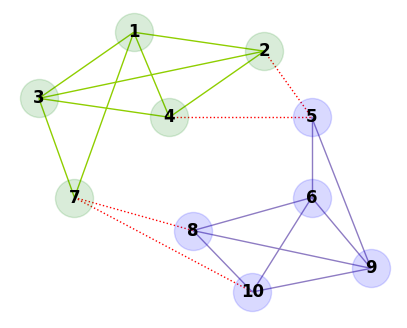

In [ ]:
fig, ax = plt.subplots(figsize=(5,4))

nodi_1 = cut[0]
nodi_2 = cut[1]

#pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, nodelist = nodi_1, node_size=750, alpha = 0.15, node_color='green', pos = pos)
nx.draw_networkx_nodes(G, nodelist = nodi_2, node_size=750, alpha = 0.15, node_color='blue', pos = pos)

common = [(u,v) for u,v in G.edges(nodi_1) if u in nodi_1 and v in nodi_2]
nx.draw_networkx_edges(G, edgelist=common, edge_color = "red", pos=pos, style=':', )

nx.draw_networkx_edges(G, edgelist=[(u,v) for u,v in G.edges(nodi_1) if u and v in nodi_1],
                          edge_color = "#8fce00", pos=pos)

nx.draw_networkx_edges(G, edgelist=[(u,v) for u,v in G.edges(nodi_2) if u and v in nodi_2],
                          edge_color = "#8e7cc3", pos=pos)

text = nx.draw_networkx_labels(G, pos, font_size=12, font_color='black', font_weight='bold')

_ = ax.axis('off')

## 3) Friendship paradox:

An interesting phenomenon in **social networks** is
that a random person’s expected degree is smaller than the degree of her peers:

` Your friends are more popular than you are!`

Given an undirected graph $G = (V,E)$:

Let $X$ be a random variable representing the degree of a randomly selected node in the graph\
and $Y$ be a random variable representing the average degree of its neighbors.



Prove that $𝐸[𝑋]≤𝐸[𝑌]$ :

The expected value of $X$ is:
$$ \mu =  E[X] = \frac{1}{|V|} \sum_{i\in V} d_i = \frac{2|E|}{|V|} $$

Where the *sum of the degrees of all nodes* equals twice the number of edges in the graph.\
While its variance:

$$ \sigma_X^2 =\sum_{i\in V}(d_i- \mu)^2 \frac{1}{|V|} =  
\frac{1}{|V|} \sum_{i\in V}(d_i^2 -2\mu d_i +\mu^2) $$

$$ = \frac{1}{|V|} \left[\sum_{i}d_i^2 -4\mu\text{|E|} + \mu^2|V|\right] =$$

$$  = \frac{\sum_{i}d_i^2}{|V|} -2\mu \frac{2|E|}{|V|} + \mu^2 = $$
$$ = \frac{\sum_{i}d_i^2}{|V|}  -2\mu^2 + \mu^2 = \frac{\sum_{i}d_i^2}{|V|}- \mu^2 = \sigma_X^2 $$


And expected value $E[Y]$ is:

$$ \mu_Y = E[Y] = \frac{1}{2|E|} \sum_{i\in V}  \sum_{j \in S_i} d_j = \frac{1}{2|E|} \sum_{i\in V} d_i^2 $$

From the variance formula above we have: $ \sum\limits_{i=1}^{|V|}d_i^2 = (\sigma_X^2+\mu^2)|V| $ so we can rewrite:

$$  \mu_Y = E[Y] = \frac{(\sigma_X^2+\mu^2)|V|}{2|E|} = \frac{(\sigma_X^2+\mu^2)}{\mu} = \mu + \frac{\sigma_X^2}{\mu} $$

This proves that:

$$ \ \mu \leq \mu + \frac{\sigma_X^2}{\mu} = \mu_Y $$


We have that $ E[X] = E[Y] $ when $ \frac{\sigma^2}{\mu} = 0 $\
In this case the graph would be regular connected, this means that each node has same degree of its neighboring nodes

## 4)  Streaming Algorithm for Graph Connectivity:

A graph arrives as a stream of edges $ \mathcal{E} = e_1, e_2, ...$.\
Exactly one edge arrives at a time, with edge $e_i$ arriving at time $i$. Each edge $e_i$ consists on a pair of vertices $(u, v)$.

According to the **sliding window model** at each time $t$ only the $w$
most recent edges are considered active,  where $w$ is the window size.\
The graph that consists of the **active edges** at time $t$, given a window length $w$, is denoted with $ G(t,w) = (V,E(t,w)) $



To monitor the connectivity of the graph $G(t,w)$ I use a set of edges $C$ that represent a minimum path that connects all the nodes.

The tree defined by the edges in $C$ must remain **acyclic** at all times and should always consider the most recent edges arrived.

When a new edge arrives, I insert it into $C$ in any case and verify if it forms a cycle within $C$.\
If a cycle is detected, I remove the **oldest edge** from this cycle.\
To determine which edge is the oldest I need to keep records of the arrival timestamps of the edges in my set.

To check if a new edge closes a loop I used **DFS**

In [ ]:
def has_cycle(edges):

    adj = defaultdict(set)
    path = []
    for x, y in edges:
        adj[x].add(y)
        adj[y].add(x)

    col = defaultdict(int)
    parent = {}

    def dfs(x, p):
        col[x] = 1
        parent[x] = p

        for y in adj[x]:
            if col[y] == 0:
                if dfs(y, x):
                    return True
            elif col[y] == 1 and parent[x] != y:
                #print(f"cycle found: {y} -> ", end='')
                node = x
                path.append(y)
                while node != y:
                    #print(f"{node} -> ", end='')
                    path.append(node)
                    node = parent[node]
                #print(f"{y} |", end='')
                return path
        col[x] = 2
        return None

    for x in adj:
        if col[x] == 0:
            if(dfs(x, None)) == True:
                return path
    return False

**To decide if the graph is connected**:\
After receiving a new edge at time $t+1$, the graph $G(t+1,w)$ is connected if, upon adding the edge to set $C$ as described above,\
there are no edges in $C$ with arrival timestamps older than $(t+1)-w$.

In [ ]:
from Stream_edge import check_add_edge, do_edge_plot, do_gif

In [ ]:
folder_path = "graph_status"
os.makedirs(folder_path, exist_ok=True)

stream_edge = [("c","e"), ("b","d"), ("a","c"), ("c","b"), ("a","b"),
                ("c","d"), ("d","e"), ("b","e"), ("b","d"), ("c","e")]

In [ ]:
F = []
arrival_time = {}
window_size = 5

window = []
is_disconnected = False

times = range(1, 100)
for t in times:

    if t < len(stream_edge):
        new_edge = stream_edge[t-1]

    else:
        u = random.choice("abcde")
        v = random.choice("abcde")
        new_edge = (u,v)

        while check_add_edge(u,v, window) == False:
            u = random.choice("abcde")
            v = random.choice("abcde")
            new_edge = (u,v)

    #print(f" t:{t+1} - arrived: {new_edge}", end ="")
    print(f"\r t:{t:>2} - arrived: {new_edge}", end="", flush=True)

    arrival_time[new_edge] = t

    if (new_edge[0], new_edge[1]) not in F and (new_edge[1], new_edge[0]) not in F: F = [new_edge] + F
    else:
        this_frame = [t if t in F else (t[1], t[0]) for t in [new_edge]][0]
        arrival_time[this_frame] = t+1

    window.append(new_edge)
    cycle_path = has_cycle(F)

    if cycle_path:

        #print(f"cycle: {cycle_path}", end='')
        edge_path = [(cycle_path[i], cycle_path[i+1])
                    for i in range(len(cycle_path) - 1)] + [(cycle_path[-1], cycle_path[0])]

        loop = [t if t in F else (t[1], t[0]) for t in edge_path]

        oldest_edge_time = min(arrival_time[key] for key in  loop)
        oldest_edge = [key for key in  loop if arrival_time[key] == oldest_edge_time][0]
        #print(f" → removed: {oldest_edge} from t={oldest_edge_time}")
        #print(f"\r → removed: {oldest_edge} from t={oldest_edge_time}", flush=True)

        F.remove(oldest_edge)
        arrival_time.pop(oldest_edge)
        #do_plot(F, window, t+1)

    if len(window) > window_size: window.pop(0)

    if t-window_size >= min(arrival_time.values()):
        is_disconnected = True
        print(f" -> Disconnected! ({t-window_size:>2},{min(arrival_time.values())})")
        #print("\tis Disconnected !", t - window_size+1, min(arrival_time.values()))

    do_edge_plot(F, window, t,folder_path, discon = is_disconnected)

do_gif(folder_path, times)

 t: 6 - arrived: ('c', 'd') -> Disconnected! ( 1,1)
 t:11 - arrived: ('e', 'a') -> Disconnected! ( 6,6)
 t:34 - arrived: ('c', 'e') -> Disconnected! (29,29)
 t:43 - arrived: ('d', 'a') -> Disconnected! (38,38)
 t:44 - arrived: ('d', 'c') -> Disconnected! (39,38)
 t:45 - arrived: ('c', 'a') -> Disconnected! (40,38)
 t:47 - arrived: ('c', 'b') -> Disconnected! (42,42)
 t:52 - arrived: ('c', 'a') -> Disconnected! (47,47)
 t:74 - arrived: ('e', 'a') -> Disconnected! (69,69)
 t:78 - arrived: ('c', 'a') -> Disconnected! (73,73)
 t:82 - arrived: ('e', 'd') -> Disconnected! (77,77)
 t:99 - arrived: ('c', 'b')

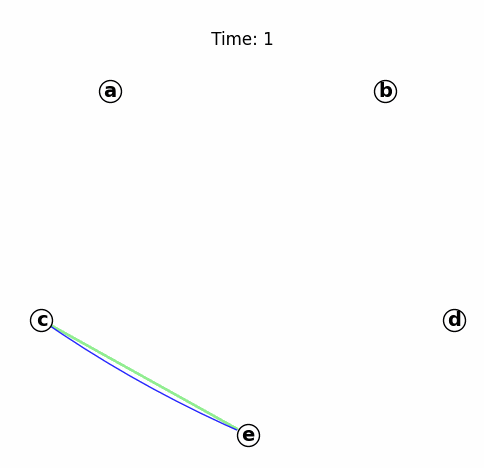

In [ ]:
Image(open('streaming_algorithm.gif','rb').read())

## 5) Opinion-formation model with back-fire

## 6) Graph Neural Networks:

In [ ]:
! pip -q install torch_geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 9.4 MB/s eta 0:00:00


In [ ]:
import torch

import torch_geometric.transforms as T
from torch_geometric.utils import to_networkx
from torch_geometric.datasets import Planetoid

In [ ]:
torch.manual_seed(42)

In [ ]:
dataset = Planetoid(root='/tmp/Pubmed', name='Pubmed', force_reload=True)

Processing...
Done!


In [ ]:
graph = dataset[0]
graph

Data(x=[19717, 500], edge_index=[2, 88648], y=[19717], train_mask=[19717], val_mask=[19717], test_mask=[19717])

In [ ]:
g = to_networkx(graph, node_attrs=['x'])

avg_degre = 2*g.number_of_edges() / g.number_of_nodes()
#avg_degre = sum(dict(g.degree()).values()) / g.number_of_nodes()

clustering_coef = nx.average_clustering(g)

print(f'Number of nodes (publications): {graph.num_nodes:>8}')
print(f'Number of edges (citation links): {graph.num_edges:>6}')
print(f'Average citations per publication: {round(avg_degre, 3)}')
print(f'Clustering coefficient: {round(clustering_coef, 3):>15}')

Number of nodes (publications):    19717
Number of edges (citation links):  88648
Average citations per publication: 8.992
Clustering coefficient:            0.06


In [ ]:
degree_distrib = nx.degree_histogram(g)
nodes = [i for i in range(0, len(degree_distrib))]

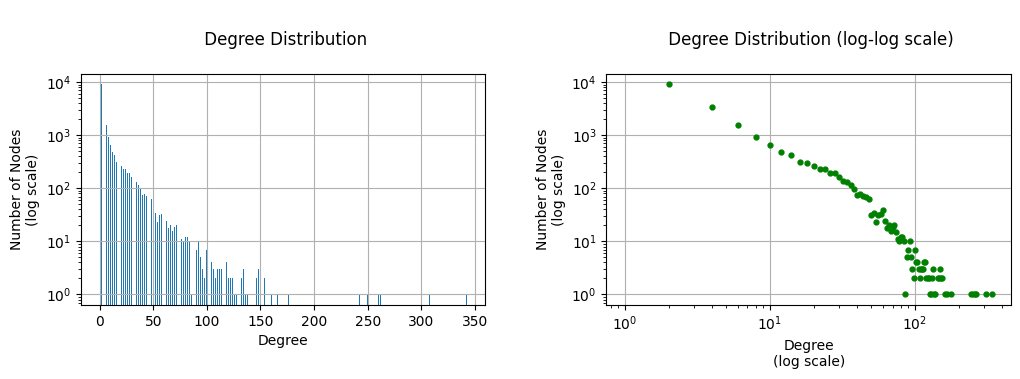

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(12, 3))

#ax1.plot(nodes, degree_distrib, '-', linewidth=2.5)
ax1.bar(nodes, degree_distrib)
ax1.set_title('\n Degree Distribution\n')
ax1.set_xlabel('Degree\n')
ax1.set_ylabel('Number of Nodes\n(log scale)')
ax1.set_yscale("log");
ax1.grid()

ax2.plot(nodes, degree_distrib, 'o', markersize=3.5, color='green')
ax2.set_title('\n Degree Distribution (log-log scale)\n')
ax2.set_xlabel('Degree\n(log scale)')
ax2.set_ylabel('Number of Nodes\n(log scale)')
ax2.set_xscale("log"); ax2.set_yscale("log")
ax2.grid()

plt.subplots_adjust(wspace=0.3)
plt.show()

In [ ]:
## Class distribution

class_distribution = sorted(Counter(graph.y.tolist()).items())
class_dict = {cls: count for cls, count in class_distribution}

print(f'Class distribution: {class_dict}')

Class distribution: {0: 4103, 1: 7739, 2: 7875}


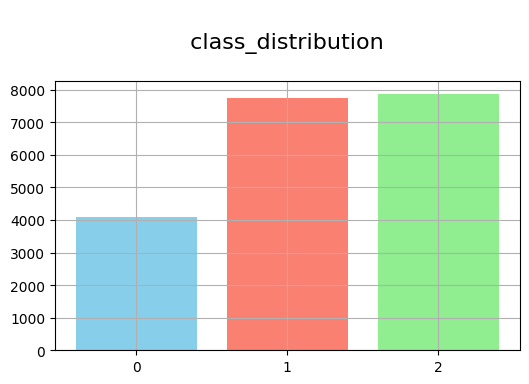

In [ ]:
plt.figure(figsize=(6, 3.5))
plt.bar(class_dict.keys(), class_dict.values(), color=['skyblue', 'salmon', 'lightgreen'])
plt.title("\n class_distribution \n", fontsize= 16)
plt.xticks(list(class_dict.keys()))
plt.grid(); plt.show()

#### Node Classification:


In [ ]:
from Graph_NN import GConv_Network, GAT_Network, SAGE_Network
from Graph_NN import train_node_classifier, eval_node_classifier

from Graph_NN import do_plot

In [ ]:
if torch.cuda.is_available(): device = "cuda:0"
else: device = "cpu"

print(f'Using device {torch.device(device)}')

Using device cuda:0


In [ ]:
# train, validation and test split

split = T.RandomNodeSplit(num_val=0.2, num_test=0.1)
graph = split(graph).to(device)

In [ ]:
# hyperparameters

lr = 0.01
wd = 5e-4
n_epochs = 25


 >> Training...

GConv_Network(
  (conv1): GCNConv(500, 256)
  (conv2): GCNConv(256, 16)
  (out): Linear(in_features=16, out_features=3, bias=True)
) 

 Epoch [ 2/25] | Loss: 1.0748 | Val_loss 1.0753 | Val_acc 0.556 - 
 Epoch [ 4/25] | Loss: 1.0449 | Val_loss 1.0476 | Val_acc 0.614 - 
 Epoch [ 6/25] | Loss: 1.0074 | Val_loss 1.0109 | Val_acc 0.625 - 
 Epoch [ 8/25] | Loss: 0.9593 | Val_loss 0.9627 | Val_acc 0.667 - 
 Epoch [10/25] | Loss: 0.8981 | Val_loss 0.9021 | Val_acc 0.781 - 
 Epoch [12/25] | Loss: 0.8420 | Val_loss 0.8471 | Val_acc 0.815 - 
 Epoch [14/25] | Loss: 0.7992 | Val_loss 0.8042 | Val_acc 0.828 - 
 Epoch [16/25] | Loss: 0.7711 | Val_loss 0.7781 | Val_acc 0.833 - 
 Epoch [18/25] | Loss: 0.7499 | Val_loss 0.7592 | Val_acc 0.846 - 
 Epoch [20/25] | Loss: 0.7370 | Val_loss 0.7391 | Val_acc 0.855 - 
 Epoch [22/25] | Loss: 0.7290 | Val_loss 0.7301 | Val_acc 0.862 - 
 Epoch [24/25] | Loss: 0.7232 | Val_loss 0.7280 | Val_acc 0.863 - 



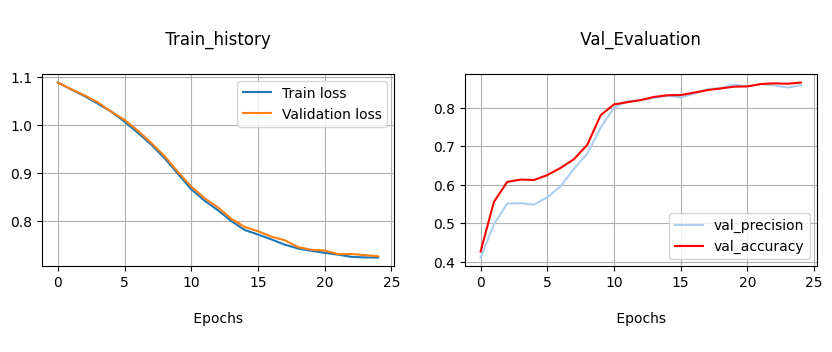


 Test accuracy: 0.874% 



In [ ]:
model = GConv_Network(dataset).to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=wd)
criterion = torch.nn.CrossEntropyLoss()

model, train_lss_curve, val_lss_curve, evaluation = train_node_classifier(model, graph,
                                                                          optimizer, criterion,
                                                                          n_epochs)
do_plot(n_epochs, train_lss_curve, val_lss_curve, evaluation)

CONV_results = eval_node_classifier(model, graph, graph.test_mask, is_test=True)

print(f'\n Test accuracy: {CONV_results[0]:.3f}% \n')


 >> Training...

GAT_Network(
  (conv1): GATConv(500, 256, heads=1)
  (conv2): GATConv(256, 16, heads=1)
  (out): Linear(in_features=16, out_features=3, bias=True)
) 

 Epoch [ 2/25] | Loss: 1.0831 | Val_loss 1.0835 | Val_acc 0.491 - 
 Epoch [ 4/25] | Loss: 1.0479 | Val_loss 1.0480 | Val_acc 0.516 - 
 Epoch [ 6/25] | Loss: 1.0090 | Val_loss 1.0117 | Val_acc 0.629 - 
 Epoch [ 8/25] | Loss: 0.9627 | Val_loss 0.9678 | Val_acc 0.658 - 
 Epoch [10/25] | Loss: 0.8982 | Val_loss 0.9035 | Val_acc 0.790 - 
 Epoch [12/25] | Loss: 0.8530 | Val_loss 0.8537 | Val_acc 0.796 - 
 Epoch [14/25] | Loss: 0.8073 | Val_loss 0.8123 | Val_acc 0.812 - 
 Epoch [16/25] | Loss: 0.7828 | Val_loss 0.7898 | Val_acc 0.825 - 
 Epoch [18/25] | Loss: 0.7633 | Val_loss 0.7735 | Val_acc 0.830 - 
 Epoch [20/25] | Loss: 0.7476 | Val_loss 0.7495 | Val_acc 0.843 - 
 Epoch [22/25] | Loss: 0.7389 | Val_loss 0.7416 | Val_acc 0.840 - 
 Epoch [24/25] | Loss: 0.7286 | Val_loss 0.7337 | Val_acc 0.856 - 



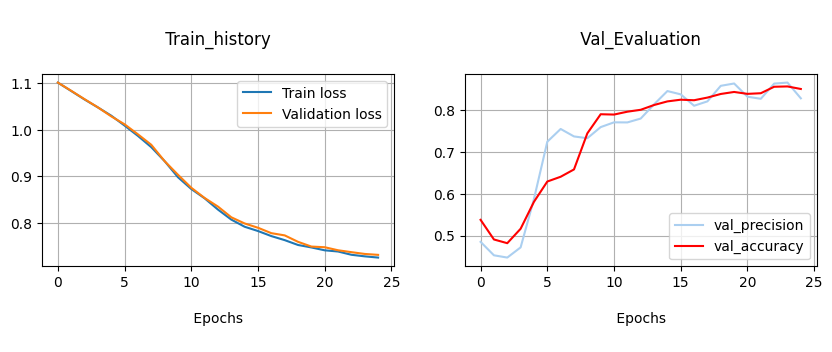


 Test accuracy: 0.861% 



In [ ]:
model = GAT_Network(dataset).to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=wd)
criterion = torch.nn.CrossEntropyLoss()

model, train_lss_curve, val_lss_curve, evaluation = train_node_classifier(model, graph,
                                                                          optimizer, criterion,
                                                                          n_epochs)
do_plot(n_epochs, train_lss_curve, val_lss_curve, evaluation)

GAT_results = eval_node_classifier(model, graph, graph.test_mask, is_test=True)

print(f'\n Test accuracy: {GAT_results[0]:.3f}% \n')


 >> Training...

SAGE_Network(
  (conv1): SAGEConv(500, 256, aggr=mean)
  (conv2): SAGEConv(256, 16, aggr=mean)
  (out): Linear(in_features=16, out_features=3, bias=True)
) 

 Epoch [ 2/25] | Loss: 1.0714 | Val_loss 1.0735 | Val_acc 0.506 - 
 Epoch [ 4/25] | Loss: 1.0120 | Val_loss 1.0140 | Val_acc 0.669 - 
 Epoch [ 6/25] | Loss: 0.8999 | Val_loss 0.9072 | Val_acc 0.771 - 
 Epoch [ 8/25] | Loss: 0.8340 | Val_loss 0.8409 | Val_acc 0.790 - 
 Epoch [10/25] | Loss: 0.7863 | Val_loss 0.7951 | Val_acc 0.813 - 
 Epoch [12/25] | Loss: 0.7642 | Val_loss 0.7737 | Val_acc 0.817 - 
 Epoch [14/25] | Loss: 0.7442 | Val_loss 0.7535 | Val_acc 0.838 - 
 Epoch [16/25] | Loss: 0.7328 | Val_loss 0.7402 | Val_acc 0.851 - 
 Epoch [18/25] | Loss: 0.7198 | Val_loss 0.7282 | Val_acc 0.846 - 
 Epoch [20/25] | Loss: 0.7159 | Val_loss 0.7273 | Val_acc 0.856 - 
 Epoch [22/25] | Loss: 0.7116 | Val_loss 0.7167 | Val_acc 0.858 - 
 Epoch [24/25] | Loss: 0.7045 | Val_loss 0.7170 | Val_acc 0.862 - 




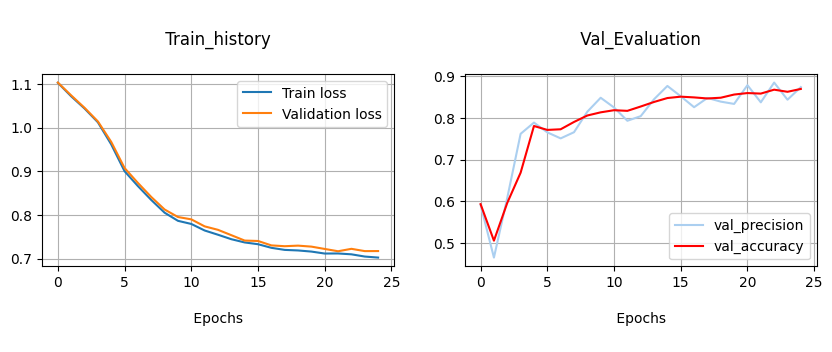


 Test accuracy: 0.881% 



In [ ]:
model = SAGE_Network(dataset).to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=wd)
criterion = torch.nn.CrossEntropyLoss()

model, train_lss_curve, val_lss_curve, evaluation = train_node_classifier(model, graph,
                                                                          optimizer, criterion,
                                                                          n_epochs)

print()
do_plot(n_epochs, train_lss_curve, val_lss_curve, evaluation)

SAGE_results = eval_node_classifier(model, graph, graph.test_mask, is_test=True)

print(f'\n Test accuracy: {SAGE_results[0]:.3f}% \n')

In [ ]:
df = pd.DataFrame(data = [CONV_results, GAT_results, SAGE_results],
                  columns = ['Accuracy', 'Precision', 'Recall', "F1-score"])

df.index.names = ['Models:']
df = df.rename({0:"GraphCONV", 1:'GraphATT', 2: 'GraphSAGE'})

# 0.881	0.881	0.938	0.909
df.style.highlight_max(color = 'lightgreen', axis = 0).format(precision=3)

,Accuracy,Precision,Recall,F1-score
Models:,,,,
GraphCONV,0.874,0.870,0.933,0.900
GraphATT,0.861,0.841,0.935,0.886
GraphSAGE,0.881,0.881,0.938,0.909


#### Link Prediction:

In [ ]:
from torch_geometric.nn import GCNConv
from torch_geometric.utils import negative_sampling

from sklearn.metrics import roc_auc_score, f1_score

In [ ]:
class Net(torch.nn.Module):
  def __init__(self, in_channels, hidden_channels, out_channels):
    super().__init__()
    self.conv1 = GCNConv(in_channels, hidden_channels)
    self.conv2 = GCNConv(hidden_channels, out_channels)
  def encode(self, x, edge_index):
    x = self.conv1(x, edge_index).relu()
    #x = torch.nn.functional.dropout(x, p=0.5, training=self.training)
    x = self.conv2(x,edge_index)
    return x

  def decode(self, z, edge_label_index):
    # product of a pair of nodes on each edge
	  return (z[edge_label_index[0]] * z[edge_label_index[1]]).sum(dim=-1)

  def decode_all(self, z):
    prob_adj = z @ z.t()
    return (prob_adj > 0).nonzero(as_tuple=False).t()

In [ ]:
def train_link_predictor(model, train_data, val_data, optimizer, criterion, n_epochs=100):

  # Initialize lists to track the loss on training data and AUC on validation data
  train_lss_curve = []; val_auc_curve		= []; val_f1_curve = []

  print("\n >> Training...\n")

  for epoch in range(1, n_epochs + 1):
    model.train()
    optimizer.zero_grad()

		# Compute node embeddings using the encode function of the model
    z = model.encode(train_data.x, train_data.edge_index)

		# Dynamically sample negative edges (edges that are not present in the graph)
    neg_edge_index = negative_sampling(
				edge_index = train_data.edge_index,
				num_nodes = train_data.num_nodes,
				num_neg_samples = train_data.edge_label_index.size(1),
				method='sparse')

		# Combine real and negative edges
    edge_label_index = torch.cat([train_data.edge_label_index, neg_edge_index],dim=-1)

		# Create labels for real edges (1) and negative edges (0)
    edge_label = torch.cat([train_data.edge_label,
                            train_data.edge_label.new_zeros(neg_edge_index.size(1))], dim=0)

		# Decode the embeddings to predict the presence of edges
    out	= model.decode(z, edge_label_index).view(-1)

    loss = criterion(out, edge_label)
    train_lss_curve.append(loss.item())

    loss.backward()
    optimizer.step()

    val_auc, f1_val = eval_link_predictor(model, val_data)
    val_auc_curve.append(val_auc.item())
    val_f1_curve.append(f1_val.item())

    if epoch % 10 == 0:
      print(f" Epoch [{epoch:>3}/{n_epochs}] | Train_loss:{loss:.3f}, Val_AUC:{val_auc:.3f}, Val_F1:{f1_val:.3f}")

  return model, (train_lss_curve, val_auc_curve, val_f1_curve)


@torch.no_grad()
def eval_link_predictor(model, data, is_test=False):

    model.eval()
    z 	= model.encode(data.x, data.edge_index)
    out = model.decode(z, data.edge_label_index).view(-1).sigmoid()

    roc_auc = roc_auc_score(data.edge_label.cpu().numpy(), out.cpu().numpy())
    y_pred = np.where(out.cpu().numpy() >= 0.5, 1, 0)
    f1 = f1_score(data.edge_label.cpu().numpy(), y_pred)

    return roc_auc, f1

In [ ]:
split = T.RandomLinkSplit(
	num_val=0.1,
	num_test=0.1,
	is_undirected=True,
	add_negative_train_samples=False,
	neg_sampling_ratio=1.0)

train_data, val_data, test_data = split(graph)

In [ ]:
n_epochs = 100

model = Net(dataset.num_features, 128, 64).to(device)

optimizer = torch.optim.Adam(params=model.parameters(), lr=lr, weight_decay=wd)
criterion = torch.nn.BCEWithLogitsLoss()

model, curves = train_link_predictor(model, train_data.to(device), val_data.to(device),
                                     optimizer, criterion, n_epochs)



 >> Training...

 Epoch [ 10/100] | Train_loss:0.656, Val_AUC:0.759, Val_F1:0.667
 Epoch [ 20/100] | Train_loss:0.606, Val_AUC:0.899, Val_F1:0.718
 Epoch [ 30/100] | Train_loss:0.544, Val_AUC:0.850, Val_F1:0.746
 Epoch [ 40/100] | Train_loss:0.522, Val_AUC:0.896, Val_F1:0.761
 Epoch [ 50/100] | Train_loss:0.493, Val_AUC:0.914, Val_F1:0.776
 Epoch [ 60/100] | Train_loss:0.481, Val_AUC:0.918, Val_F1:0.783
 Epoch [ 70/100] | Train_loss:0.481, Val_AUC:0.919, Val_F1:0.785
 Epoch [ 80/100] | Train_loss:0.479, Val_AUC:0.921, Val_F1:0.785
 Epoch [ 90/100] | Train_loss:0.478, Val_AUC:0.923, Val_F1:0.784
 Epoch [100/100] | Train_loss:0.479, Val_AUC:0.921, Val_F1:0.786


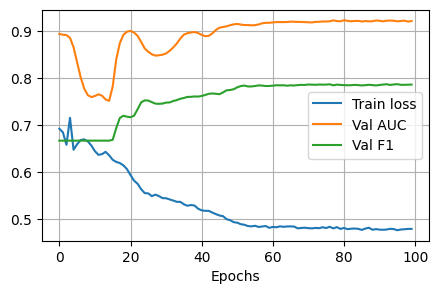

In [ ]:
plt.figure(figsize=(5,3))
plt.plot(range(n_epochs), curves[0], label='Train loss')
plt.plot(range(n_epochs), curves[1], label='Val AUC')
plt.plot(range(n_epochs), curves[2], label='Val F1')
plt.xlabel('Epochs')
plt.legend(); plt.grid()
plt.show()

In [ ]:
test_roc_auc, test_f1 = eval_link_predictor(model, test_data)

print(f'\nTest:')
print(f' ROC_AUC: {test_roc_auc:.3f} %')   # ROC_AUC: 0.924 %
print(f'      F1: {test_f1:.3f} %')        #      F1: 0.789 %


Test:
 ROC_AUC: 0.926 %
      F1: 0.785 %


-------------------------------------------------
<br/><br/>